## The following securities are included in the Markowitz Portfolio Optimization:
#### XLK, XLF, XLV, XLY, XLP, XLE, XLU, XLI, VNQ

In [67]:
etfs = ['XLK','XLF', 'XLV', 'XLY', 'XLP', 'XLE', 'XLU', 'XLI', 'VNQ']
#etfs = ["AAPL", "MSFT", "AMZN", "GOOGL", "TSLA", "NVDA", "JNJ", "V", "MA", "DIS", "GME", "KSS", "XELA", "SPCE", "BB", "CLNE", "RIG", "MELI"]

## Collect security data from yfinance for a period of **10 Years**
##### *this is only done if data is not already pickled*
> You may refresh the data by deleting the security_data.pkl file

In [68]:
import os
import pickle
import yfinance as yf
import math
security_data = None
if 'security_data.pkl' not in os.listdir():
    security_data = {etf: yf.Ticker(etf).history(period='max') for etf in etfs}
    pickle.dump(security_data, open('security_data.pkl', 'wb+'))
else:
    security_data = pickle.load(open('security_data.pkl', 'rb'))
for etf in security_data:
    security_data[etf] = security_data[etf].tail(600)

## Calculate returns and covariance matrix
>$R_t = \frac{p_t}{p_{t-1}} - 1$ where $p_t$ is the ***close*** price of a security at time t.

In [69]:
import pandas as pd
import numpy as np
return_data = {}
for etf in security_data:
    price_stream = security_data[etf]['Close']
    return_stream = [0]
    for i in range(1, len(price_stream)):
        return_stream.append(price_stream.iloc[i]/price_stream.iloc[i-1] - 1)
    return_data[etf] = pd.DataFrame({'Date': security_data[etf].index, 'Returns': return_stream})

returns_df = pd.DataFrame({etf: return_data[etf]['Returns'] for etf in return_data}) # returns dataframe where each security is a column vector;
covariance_df = returns_df.cov() # covariance matrix! in dataframe format
covariance_matrix = np.asmatrix(covariance_df)

In [78]:
xlk_returns = security_data['XLK']['Close'] / security_data['XLK']['Close'].shift(1) - 1
xlk_returns = xlk_returns.fillna(method='ffill').dropna()
print(xlk_returns.head())
print(returns_df['XLK'].head())

Date
2022-07-22 00:00:00-04:00   -0.013799
2022-07-25 00:00:00-04:00   -0.006340
2022-07-26 00:00:00-04:00   -0.016208
2022-07-27 00:00:00-04:00    0.043015
2022-07-28 00:00:00-04:00    0.015224
Name: Close, dtype: float64
0    0.000000
1   -0.013799
2   -0.006340
3   -0.016208
4    0.043015
Name: XLK, dtype: float64


C:\Users\Edwar\AppData\Local\Temp\ipykernel_28668\3892319894.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  xlk_returns = xlk_returns.fillna(method='ffill').dropna()


In [21]:
for etf in security_data:
    print(return_data[etf]['Returns'].mean())

0.0008937216074743333
0.0009083207045281423
0.0011283523074697975
0.0007362808949427422
0.0012573582553310465
0.00420649470744691
-7.130198595296493e-05
0.000801004903176117
0.0008931658987100655
0.000506120295041404
0.002045574498369295
-2.367795366347014e-06
-0.00664903013836404
-0.003356514139965906
-0.0009598886427297267
-0.0002837826015781806
0.0012615453407109868
0.002133067576110014


In [22]:
covariance_matrix

matrix([[ 2.54046874e-04,  1.62907989e-04,  1.74649892e-04,
          1.77196773e-04,  2.51308284e-04,  2.49110880e-04,
          2.08576669e-05,  8.33294896e-05,  9.85686133e-05,
          1.08123226e-04,  2.35971498e-04,  1.49334027e-04,
          1.49051607e-04,  2.48827279e-04,  1.92762733e-04,
          1.61347618e-04,  1.10733112e-04,  1.74764012e-04],
        [ 1.62907989e-04,  2.68336884e-04,  2.39218886e-04,
          2.14937505e-04,  1.98103669e-04,  3.17155614e-04,
          1.59133653e-05,  8.05181811e-05,  1.02320716e-04,
          1.13921124e-04,  1.49809160e-04,  1.31130661e-04,
          1.29696531e-04,  1.90473663e-04,  1.79433997e-04,
          1.47559137e-04,  9.90391362e-05,  1.89804627e-04],
        [ 1.74649892e-04,  2.39218886e-04,  4.78550350e-04,
          2.73620956e-04,  3.11511117e-04,  3.62798066e-04,
          6.87962432e-06,  9.54237080e-05,  1.18069337e-04,
          1.61484960e-04,  2.60971421e-04,  2.26873579e-04,
          3.40821235e-04,  3.30780956e

In [23]:
covariance_df

,AAPL,MSFT,AMZN,GOOGL,TSLA,NVDA,JNJ,V,MA,DIS,GME,KSS,XELA,SPCE,BB,CLNE,RIG,MELI
AAPL,0.000254,0.000163,0.000175,0.000177,0.000251,0.000249,0.000021,0.000083,0.000099,0.000108,0.000236,0.000149,0.000149,0.000249,0.000193,0.000161,0.000111,0.000175
MSFT,0.000163,0.000268,0.000239,0.000215,0.000198,0.000317,0.000016,0.000081,0.000102,0.000114,0.000150,0.000131,0.000130,0.000190,0.000179,0.000148,0.000099,0.000190
AMZN,0.000175,0.000239,0.000479,0.000274,0.000312,0.000363,0.000007,0.000095,0.000118,0.000161,0.000261,0.000227,0.000341,0.000331,0.000276,0.000240,0.000157,0.000270
GOOGL,0.000177,0.000215,0.000274,0.000389,0.000229,0.000309,0.000015,0.000084,0.000104,0.000122,0.000215,0.000183,0.000163,0.000288,0.000193,0.000180,0.000116,0.000227
TSLA,0.000251,0.000198,0.000312,0.000229,0.001393,0.000462,-0.000005,0.000129,0.000133,0.000201,0.000523,0.000263,0.000447,0.000620,0.000401,0.000354,0.000199,0.000369
NVDA,0.000249,0.000317,0.000363,0.000309,0.000462,0.001109,-0.000039,0.000131,0.000167,0.000191,0.000396,0.000224,0.000275,0.000473,0.000280,0.000268,0.000272,0.000372
JNJ,0.000021,0.000016,0.000007,0.000015,-0.000005,-0.000039,0.000100,0.000029,0.000029,0.000019,-0.000007,0.000025,0.000007,0.000023,0.000025,0.000035,-0.000007,0.000008
V,0.000083,0.000081,0.000095,0.000084,0.000129,0.000131,0.000029,0.000136,0.000119,0.000086,0.000107,0.000090,0.000058,0.000123,0.000112,0.000119,0.000088,0.000120
MA,0.000099,0.000102,0.000118,0.000104,0.000133,0.000167,0.000029,0.000119,0.000149,0.000103,0.000115,0.000127,0.000108,0.000159,0.000135,0.000147,0.000108,0.000149
DIS,0.000108,0.000114,0.000161,0.000122,0.000201,0.000191,0.000019,0.000086,0.000103,0.000359,0.000197,0.000230,0.000296,0.000353,0.000222,0.000226,0.000202,0.000193


In [24]:
def backtest(returns_dict, weights_dict):
    adjusted_returns_dict = {etf: returns_dict[etf].copy() for etf in returns_dict} # copy original returns dictionary
    for etf in adjusted_returns_dict: # adjusted returns simply add 1 to the 'Returns' so that you can multiple all returns together to get the total returns
        adjusted_returns_dict[etf]['Adjusted Returns'] = adjusted_returns_dict[etf]['Returns'] + 1
    total_returns = 0
    for etf in adjusted_returns_dict:
        #total_returns += weights_dict[etf] * adjusted_returns_dict[etf]['Adjusted Returns'].cumprod().iloc[-1]
        total_returns += weights_dict[etf] * returns_dict[etf]['Returns'].mean()
    return total_returns

def negated_backtest_1_arg(weights_list):
    #print(weights_list)
    weights_dict = {etf: weights_list[i] for i, etf in enumerate(sorted(list(return_data.keys())))}
    return -1 * backtest(return_data, weights_dict)

def weights_constraint(x):
    ones = np.ones((1,len(x))).T # nx1 column vector of 1's
    w = np.asmatrix(x).T # nx1 column vector of weights
    return (ones.T @ w).item() - 1

def variance_constraint(x, gamma):
    w = np.asmatrix(x).T #nx1 column vector of weights
    #print((w.T @ covariance_matrix @ w).item())
    import math
    return math.sqrt( (w.T @ covariance_matrix @ w).item() ) - gamma # variance = (wT)(C)(w)

In [25]:
weights_dict = {etf: 0 for etf in return_data}
weights_dict['XLP'] = 1
backtest(return_data, weights_dict)
#negated_backtest_1_arg(weights_dict)

np.float64(0.0)

In [26]:
w = np.asmatrix([1/len(return_data) for etf in return_data]).T
print(math.sqrt(w.T @ covariance_matrix @ w))

0.017596128620653278


C:\Users\Edwar\AppData\Local\Temp\ipykernel_28668\4162463680.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(math.sqrt(w.T @ covariance_matrix @ w))


In [58]:
import scipy
from scipy.optimize import minimize

x0 = [1/len(return_data) for etf in return_data]
gamma = 0.001
constraints = [{'type': 'eq', 'fun': weights_constraint}, {'type': 'ineq', 'fun': variance_constraint, 'args': (gamma,)}]
bounds = [(0,1) for etf in return_data]
options = {
    'maxiter': 20,
    'ftol': 1e-3
}

answers = [] #(return, risk, weights)
for i in np.arange(0, 0.5, 0.001):
    #print(i)
    gamma = i
    constraints = [{'type': 'eq', 'fun': weights_constraint}, {'type': 'ineq', 'fun': variance_constraint, 'args': (gamma,)}]
    optimal_weights = scipy.optimize.minimize(negated_backtest_1_arg, x0, bounds=bounds, constraints=constraints, options=options)
    answers.append((-optimal_weights['fun'], variance_constraint(optimal_weights['x'], gamma) + gamma, optimal_weights['x']))

In [59]:
#gamma = 0.04
constraints = [{'type': 'eq', 'fun': weights_constraint}, {'type': 'ineq', 'fun': variance_constraint, 'args': (gamma,)}]
a = scipy.optimize.minimize(negated_backtest_1_arg, x0, bounds=bounds, constraints=constraints)
print(a)

 message: Positive directional derivative for linesearch
 success: False
  status: 8
     fun: -0.004206494707448926
       x: [ 2.104e-16  1.184e-15 ...  2.760e-17  2.729e-17]
     nit: 23
     jac: [-8.937e-04 -1.128e-03 ... -8.010e-04  6.649e-03]
    nfev: 521
    njev: 19


500


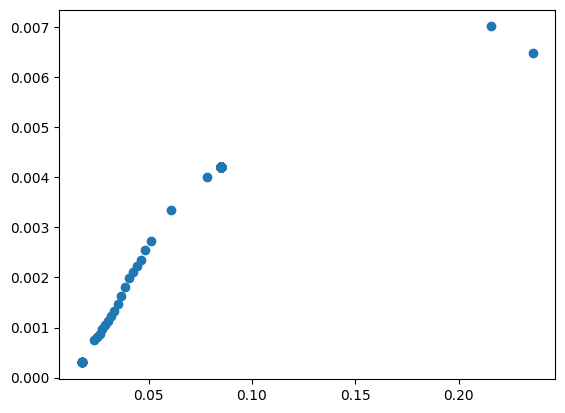

In [60]:
#for answer in answers:
    #print(f'Risk: {answer[1]}\nReturn: {answer[0]}\nWeights: {answer[2]}\n')

ri = []
re = []

for answer in answers:
    ri.append(answer[1])
    re.append(answer[0])

print(len(answers))

t_df = pd.DataFrame({'Risk': ri, 'Return': re})
plt.scatter(t_df['Risk'], t_df['Return'])
#t_df

In [30]:
import matplotlib.pyplot as plt
import random
returns = []
risks = []

import math
for n in range(5000):
    weights = [math.pow(2.71828,random.uniform(0.5,2)) for etf in return_data]
    total = sum(weights)
    for i in range(len(weights)):
        weights[i] /= total
    weights_dict = {etf: weights[i] for i, etf in enumerate(sorted(list(return_data.keys())))}
    b = backtest(return_data, weights_dict)
    
    returns.append(b)
    risks.append(variance_constraint(weights,0))

rr_df = pd.DataFrame({'Risk': risks, 'Returns': returns})


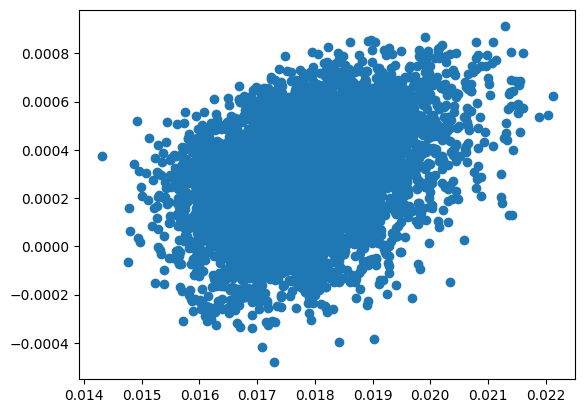

In [617]:

plt.scatter(rr_df['Risk'], rr_df['Returns'])

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
list_of_returns = {"Stock " + str(i): [] for i in range(10)}
#mean = random.random() * 0 # Average return
#std_dev = random.random() * 0.04  # Standard deviation of returns
# Generate a random number from the normal distribution
#random_return = np.random.normal(mean, std_dev)



total_ret = {etf: 1 for etf in list_of_returns}
for etf in list_of_returns:
    mean = random.random() * 0  # Average return
    std_dev = random.random() * 0.1
    for i in range(365):
        list_of_returns[etf].append(np.random.normal(mean, std_dev))
        total_ret[etf] *= list_of_returns[etf][-1] + 1
df1 = pd.DataFrame({etf: list_of_returns[etf] for etf in list_of_returns})
covariance = df1.cov()
cov_matrix = np.asmatrix(covariance)


std_list = []
uR_list = []
for n in range(5000):


    weights = [random.random() for i in range(10)]
    total = sum(weights)
    for i in range(len(weights)):
        weights[i] /= total
    
    

    w = np.asmatrix(weights).T
    std_list.append(math.sqrt(w.T @ cov_matrix @ w))
    uR_list.append((w.T @ np.asmatrix(list(total_ret.values())).T).item())

#print(sum(list_of_returns['Stock 1']) / 365)
#print(len(list_of_returns['Stock 1']))
#print(list_of_returns['Stock 1'])
    #print(list_of_returns[etf])
#print(df1)

C:\Users\Edwar\AppData\Local\Temp\ipykernel_28668\1352856887.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  std_list.append(math.sqrt(w.T @ cov_matrix @ w))


In [43]:
df2 = pd.DataFrame({'Mean Returns': uR_list, 'StdDev': std_list})

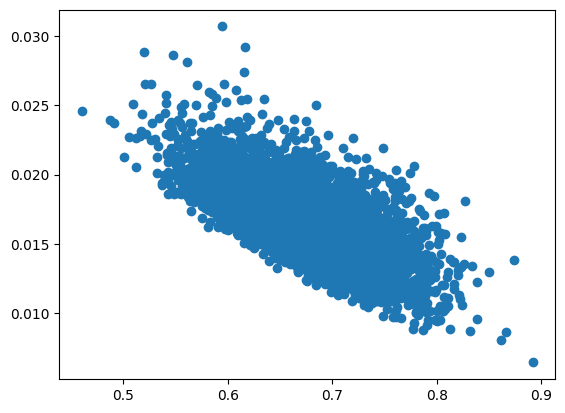

In [48]:
plt.scatter(uR_list, std_list)
# dont use this, its just a test!

In [45]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma


In [46]:
return_vec = np.random.randn(10, 365)
n_portfolios = 10000
means, stds = np.column_stack([
    random_portfolio(return_vec) 
    for _ in range(n_portfolios)
])

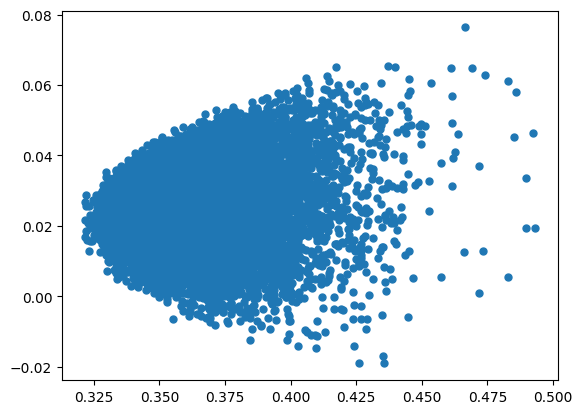

In [49]:
plt.plot(stds, means, 'o', markersize=5)
# this is the theoretic shape of the curve

In [274]:
return_vec.shape

(10, 365)